In [1]:
import tikzplotlib
import glob
import os
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import plotReportLib
from plotReportLib import myfunctions as fcn

In [2]:
# importing data
flow_data    = fcn.importPlotData('../01-mean-flow/mean-flow513.dat')
LEE_L2_data  = fcn.importPlotData('../02-method-of-manufactured-solutions/L2-LEE.dat')
LEE_ROC_data = fcn.importPlotData('../02-method-of-manufactured-solutions/ROC-LEE.dat')
SND_L2_data  = fcn.importPlotData('../02-method-of-manufactured-solutions/L2-sound_speed-.dat')
SND_ROC_data = fcn.importPlotData('../02-method-of-manufactured-solutions/ROC-sound_speed.dat')

Delta_r    = LEE_ROC_data.Delta_r
LEE_ROC    = LEE_ROC_data.ROC
SND_ROC    = SND_ROC_data.ROC
GridPoints = LEE_L2_data.GridPoints

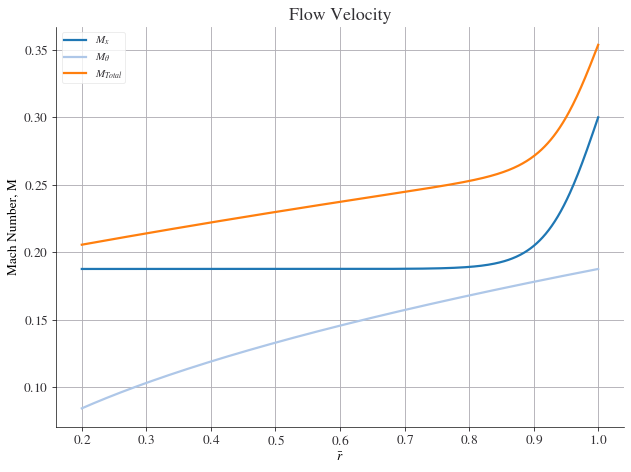

In [3]:
plt.figure(figsize=(8, 6), dpi=80)
plt.style.use('plot_style.txt')
# plot data

plt.rcParams['figure.figsize'] = [10, 5]
plt.plot( \
         flow_data['radius'],flow_data['M_x'], \
         label = '$M_{x}$', \
        )

plt.plot(\
         flow_data['radius'],flow_data['M_theta'], \
         label = '$M_{\\theta}$' , \
        )

plt.plot(\
         flow_data['radius'],(flow_data['M_x']**2+ flow_data['M_theta']**2)**0.5, \
         label = '$M_{Total}$' , \
        )



# add details
plt.title('Flow Velocity')
plt.ylabel('Mach Number, M')
plt.xlabel(r'$\bar{r}$')
plt.legend()
plt.tight_layout()

plt.grid(True)
tikzplotlib.save("tex-outputs/MachDistribution.tex")

In [4]:
def plot_measurement(args, kwargs,x_label,y_label):
    # Keyword arguments can be accessed as a normal dictionary
    mpl.rcParams['lines.linewidth'] = 2
    mpl.rcParams['lines.color'] = 'r'
    
    mpl.pyplot.plot(*args, **kwargs)
    mpl.pyplot.xlabel(x_label)
    mpl.pyplot.ylabel(y_label)
    mpl.pyplot.legend()

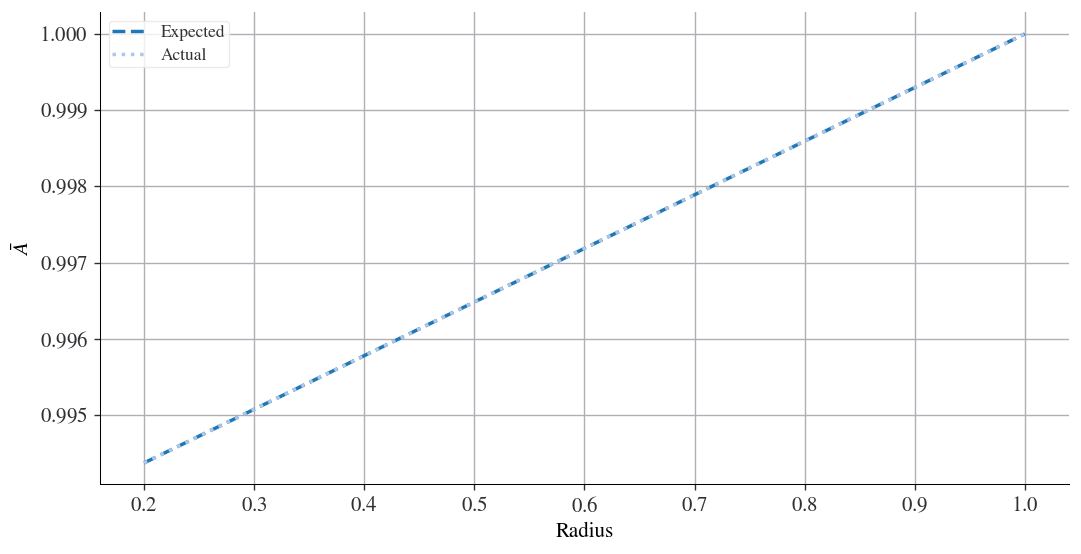

In [5]:
fig, ax = plt.subplots(1,1) 
plt.plot(\
         flow_data['radius'],flow_data['A_expected'], \
         label ='Expected' ,\
         linestyle = 'dashed')

plt.plot(\
         flow_data['radius'],flow_data['A_actual'], \
         label ='Actual',\
         linestyle = 'dotted')

plt.ylabel(r'$\bar{A}$')
plt.xlabel('Radius')
plt.grid(True)
plt.legend()
tikzplotlib.save("tex-outputs/SoundSpeedFromIntegration.tex")

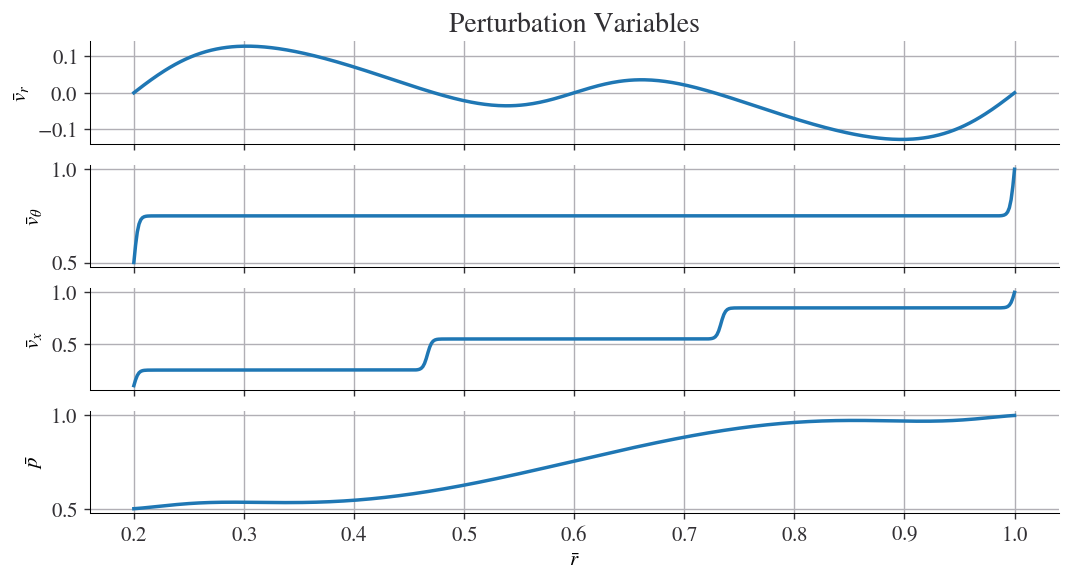

In [6]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,sharex=True)

ax1.set_title('Perturbation Variables')
ax1.plot(\
         flow_data['radius'],flow_data['vR'] \
         )
ax1.set_ylabel(r'$\bar{v}_r$')
ax2.plot(\
         flow_data['radius'],flow_data['vTh'] \
         )
ax2.set_ylabel(r'$\bar{v}_{\theta}$')
ax3.plot(\
         flow_data['radius'],flow_data['vX']\
        )
ax3.set_ylabel(r'$\bar{v}_x$')
ax4.plot(\
         flow_data['radius'],flow_data['Pr']\
        )
ax4.set_ylabel(r'$\bar{p}$')
ax4.set_xlabel(r'$\bar{r}$')
tikzplotlib.save("tex-outputs/PerturbationVariables.tex")

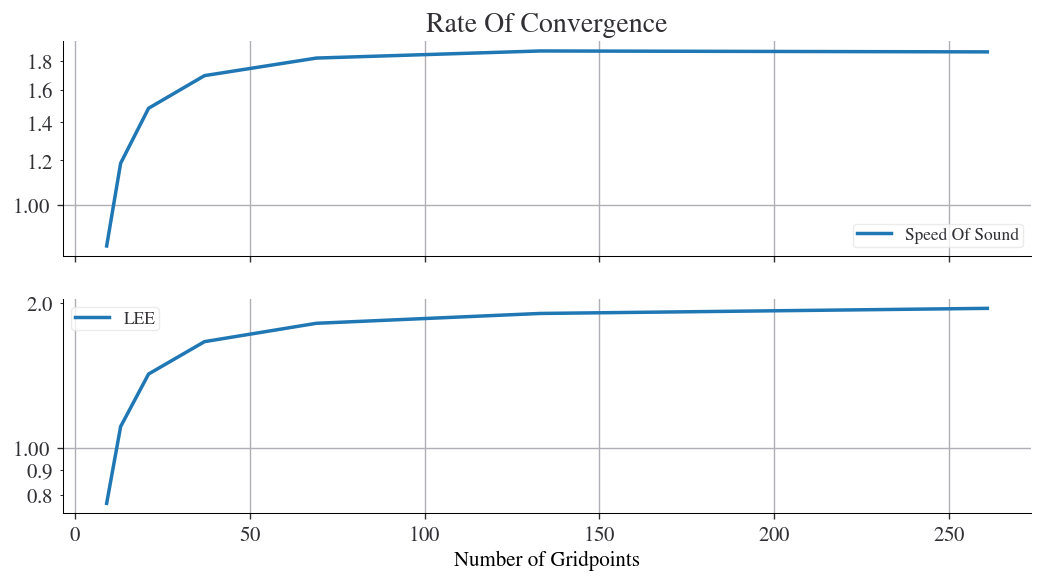

In [7]:
fig, (ax1,ax2) = plt.subplots( \
                      nrows=2, \
                      ncols=1, \
                             sharex=True)
ax1.semilogy(GridPoints[1:],SND_ROC,label='Speed Of Sound')
ax1.legend()
ax1.set_title('Rate Of Convergence')
ax2.semilogy(GridPoints[1:],LEE_ROC,label='LEE')
ax2.legend()
ax2.set_xlabel('Number of Gridpoints')
ax1.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax2.yaxis.set_major_formatter(mticker.ScalarFormatter())

ax1.yaxis.set_minor_formatter(mticker.ScalarFormatter())
ax2.yaxis.set_minor_formatter(mticker.ScalarFormatter())

tikzplotlib.save("tex-outputs/ROC.tex",encoding='utf-8',strict=True,extra_axis_parameters=['yticklabel style={/pgf/number format/fixed}'])

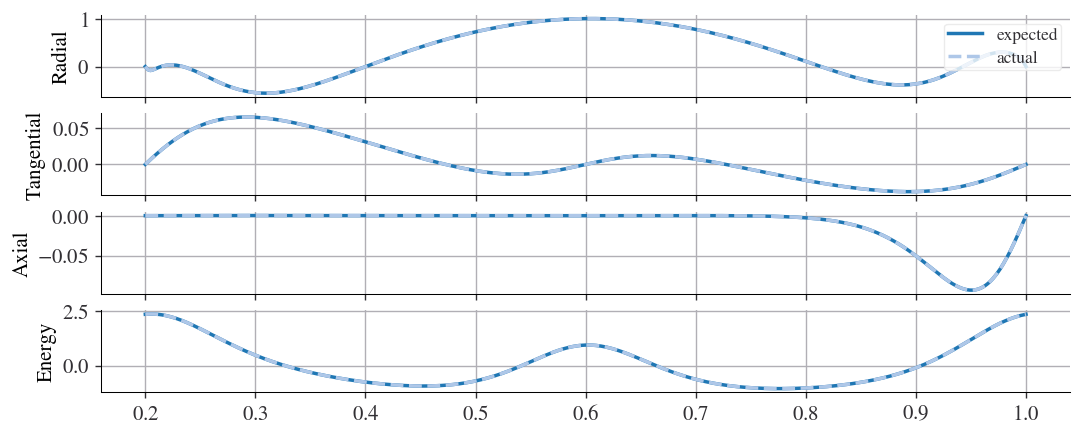

In [8]:
#plt.semilogy(Delta_r,LEE_ROC)
fig, ax = plt.subplots(nrows =4, ncols=1,sharex=True,figsize=(10,4))

# can i loop though axes?
ax[0].set_ylabel('Radial')
ax[0].plot(flow_data['radius'],flow_data['S_1_e'],label='expected')
ax[0].plot(flow_data['radius'],flow_data['S_1_a'],label='actual', linestyle = 'dashed')
ax[0].legend(loc="upper right")
ax[1].set_ylabel('Tangential')
ax[1].plot(flow_data['radius'],flow_data['S_2_e'])
ax[1].plot(flow_data['radius'],flow_data['S_2_a'], linestyle = 'dashed')
ax[2].set_ylabel('Axial')
ax[2].plot(flow_data['radius'],flow_data['S_3_e'])
ax[2].plot(flow_data['radius'],flow_data['S_3_a'], linestyle = 'dashed')
ax[3].set_ylabel('Energy')
ax[3].plot(flow_data['radius'],flow_data['S_4_e'])
ax[3].plot(flow_data['radius'],flow_data['S_4_a'], linestyle = 'dashed')
tikzplotlib.save("tex-outputs/SourceTermData.tex")